In [1]:
import torch
from torchvision import datasets, transforms
import sys
sys.path.insert(0, '..')
from utils import *
import matplotlib.pyplot as plt
import os
import shutil
from PIL import Image

# CIFAR-100

In [2]:
train_data, _ = load_data('cifar100', train=True)

Files already downloaded and verified


In [3]:
fine_labels = [
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
]

coarse_to_fine_dict = {
'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
'household electrical device': ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'],
'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
'people': ['baby', 'boy', 'girl', 'man', 'woman'],
'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor'],
}

fine_to_coarse_dict = \
{0: 4,
 1: 1,
 2: 14,
 3: 8,
 4: 0,
 5: 6,
 6: 7,
 7: 7,
 8: 18,
 9: 3,
 10: 3,
 11: 14,
 12: 9,
 13: 18,
 14: 7,
 15: 11,
 16: 3,
 17: 9,
 18: 7,
 19: 11,
 20: 6,
 21: 11,
 22: 5,
 23: 10,
 24: 7,
 25: 6,
 26: 13,
 27: 15,
 28: 3,
 29: 15,
 30: 0,
 31: 11,
 32: 1,
 33: 10,
 34: 12,
 35: 14,
 36: 16,
 37: 9,
 38: 11,
 39: 5,
 40: 5,
 41: 19,
 42: 8,
 43: 8,
 44: 15,
 45: 13,
 46: 14,
 47: 17,
 48: 18,
 49: 10,
 50: 16,
 51: 4,
 52: 17,
 53: 4,
 54: 2,
 55: 0,
 56: 17,
 57: 4,
 58: 18,
 59: 17,
 60: 10,
 61: 3,
 62: 2,
 63: 12,
 64: 12,
 65: 16,
 66: 12,
 67: 1,
 68: 9,
 69: 19,
 70: 2,
 71: 10,
 72: 0,
 73: 1,
 74: 16,
 75: 12,
 76: 9,
 77: 13,
 78: 15,
 79: 13,
 80: 16,
 81: 19,
 82: 2,
 83: 4,
 84: 6,
 85: 19,
 86: 5,
 87: 5,
 88: 8,
 89: 19,
 90: 18,
 91: 1,
 92: 2,
 93: 15,
 94: 6,
 95: 0,
 96: 17,
 97: 8,
 98: 14,
 99: 13}

In [4]:
with open('./cifar100_overlap.txt', 'r') as f:
    cifar100_overlap = f.read()

In [5]:
fine_to_wnid = {}
wnid_to_fine = {}

assert len(cifar100_overlap.split('\n\n\n')) == 20
for coarse in cifar100_overlap.split('\n\n\n'):
    assert len(coarse.split('\n\n')) == 5
    for fine in coarse.split('\n\n'):
        fine_to_wnid[fine.split('\n')[0]] = ['n' + x for x in fine.split('\n')[1:]]
        for wnid in ['n' + x for x in fine.split('\n')[1:]]:
            wnid_to_fine[wnid] = fine.split('\n')[0]

In [6]:
fine_to_wnid

{'beaver': ['n02363005'],
 'dolphin': [],
 'otter': ['n02444819'],
 'seal': [],
 'whale': ['n02066245', 'n02071294'],
 'aquarium_fish': ['n01443537'],
 'flatfish': [],
 'ray': ['n01498041'],
 'shark': ['n01484850', 'n01491361', 'n01494475'],
 'trout': [],
 'orchid': [],
 'poppy': [],
 'rose': [],
 'sunflower': [],
 'tulip': [],
 'bottle': ['n02823428', 'n04557648', 'n04591713'],
 'bowl': ['n03775546', 'n04263257'],
 'can': ['n03983396'],
 'cup': ['n07930864'],
 'plate': ['n07579787'],
 'apple': ['n07742313'],
 'mushroom': ['n07734744'],
 'orange': ['n07747607'],
 'pear': [],
 'sweet_pepper': ['n07720875'],
 'clock': ['n02708093', 'n03196217', 'n04548280'],
 'computer_keyboard': ['n03085013'],
 'lamp': ['n03637318', 'n04380533'],
 'telephone': ['n02992529', 'n03187595'],
 'television': ['n04404412'],
 'bed': ['n03388549'],
 'chair': ['n04099969', 'n02791124', 'n03376595'],
 'couch': ['n04344873'],
 'table': ['n03201208'],
 'wardrobe': ['n04550184'],
 'bee': ['n02206856'],
 'beetle': ['n

In [7]:
wnid_to_fine

{'n02363005': 'beaver',
 'n02444819': 'otter',
 'n02066245': 'whale',
 'n02071294': 'whale',
 'n01443537': 'aquarium_fish',
 'n01498041': 'ray',
 'n01484850': 'shark',
 'n01491361': 'shark',
 'n01494475': 'shark',
 'n02823428': 'bottle',
 'n04557648': 'bottle',
 'n04591713': 'bottle',
 'n03775546': 'bowl',
 'n04263257': 'bowl',
 'n03983396': 'can',
 'n07930864': 'cup',
 'n07579787': 'plate',
 'n07742313': 'apple',
 'n07734744': 'mushroom',
 'n07747607': 'orange',
 'n07720875': 'sweet_pepper',
 'n02708093': 'clock',
 'n03196217': 'clock',
 'n04548280': 'clock',
 'n03085013': 'computer_keyboard',
 'n03637318': 'lamp',
 'n04380533': 'lamp',
 'n02992529': 'telephone',
 'n03187595': 'telephone',
 'n04404412': 'television',
 'n03388549': 'bed',
 'n04099969': 'chair',
 'n02791124': 'chair',
 'n03376595': 'chair',
 'n04344873': 'couch',
 'n03201208': 'table',
 'n04550184': 'wardrobe',
 'n02206856': 'bee',
 'n02165105': 'beetle',
 'n02165456': 'beetle',
 'n02167151': 'beetle',
 'n02168699': 'be

In [8]:
len(wnid_to_fine) * 500  # number of training examples we will have

62500

In [9]:
for k in fine_to_wnid.keys():
    assert k in fine_labels, k

In [10]:
imagenet_val = datasets.ImageFolder('your-path-here/ILSVRC2012_pytorch/val',
                                    transform=transforms.ToTensor())

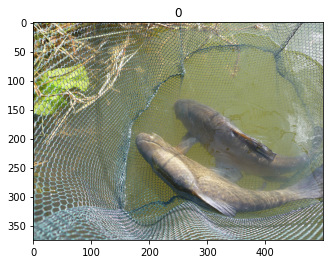

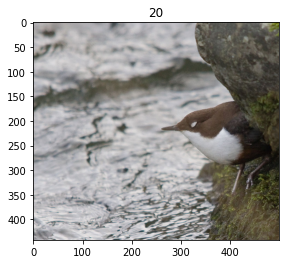

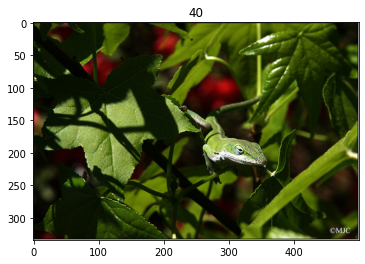

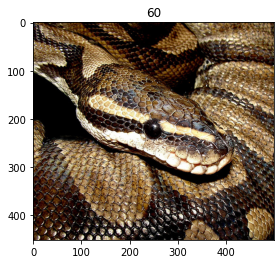

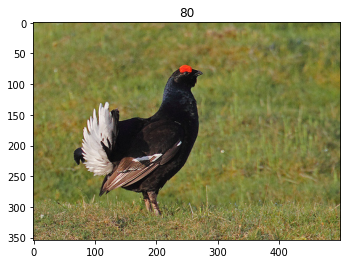

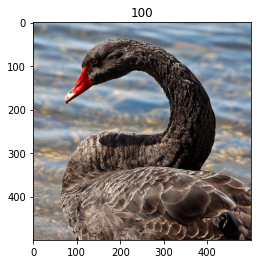

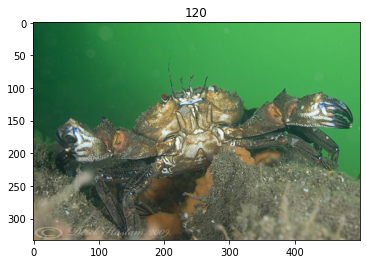

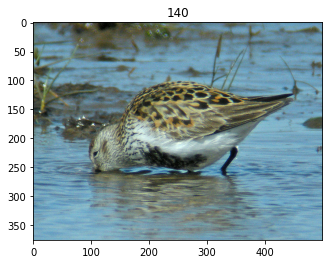

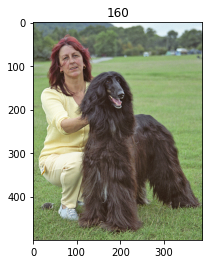

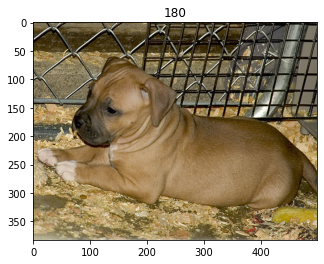

In [11]:
for idx in range(0, 10000, 1000):
    img, label = imagenet_val[idx]
    img = img.permute(1,2,0).numpy()
    plt.figure()
    plt.imshow(img)
    plt.title(label)
    plt.show()

In [10]:
with open('./imagenet_label_to_synset.txt', 'r') as f:
    imagenet_label_to_synset = eval(f.read())

In [11]:
imagenet_label_to_synset[0]

{'id': '01440764-n',
 'label': 'tench, Tinca tinca',
 'uri': 'http://wordnet-rdf.princeton.edu/wn30/01440764-n'}

In [12]:
!ls /scratch/mantas3/ILSVRC2012_pytorch/train

n01440764  n02037110  n02125311  n02799071  n03443371  n03929855  n04435653
n01443537  n02051845  n02127052  n02802426  n03444034  n03930313  n04442312
n01484850  n02056570  n02128385  n02804414  n03445777  n03930630  n04443257
n01491361  n02058221  n02128757  n02804610  n03445924  n03933933  n04447861
n01494475  n02066245  n02128925  n02807133  n03447447  n03935335  n04456115
n01496331  n02071294  n02129165  n02808304  n03447721  n03937543  n04458633
n01498041  n02074367  n02129604  n02808440  n03450230  n03938244  n04461696
n01514668  n02077923  n02130308  n02814533  n03452741  n03942813  n04462240
n01514859  n02085620  n02132136  n02814860  n03457902  n03944341  n04465501
n01518878  n02085782  n02133161  n02815834  n03459775  n03947888  n04467665
n01530575  n02085936  n02134084  n02817516  n03461385  n03950228  n04476259
n01531178  n02086079  n02134418  n02823428  n03467068  n03954731  n04479046
n01532829  n02086240  n02137549  n02823750  n03476684  n03956157  n04482393
n01534433  n

In [22]:
for x, y in zip(sorted(fine_labels), fine_labels):
    if x != y: print(x, y)

computer_keyboard couch
couch crab
crab crocodile
crocodile cup
cup dinosaur
dinosaur dolphin
dolphin elephant
elephant flatfish
flatfish forest
forest fox
fox girl
girl hamster
hamster house
house kangaroo
kangaroo computer_keyboard


In [25]:
!ls ./data

cifar-100-python	 cifar-10-python.tar.gz  places365_standard
cifar-100-python.tar.gz  FashionMNIST
cifar-10-batches-py	 MNIST


In [32]:
os.makedirs('./data/ImageNet_CIFAR100/train')
os.makedirs('./data/ImageNet_CIFAR100/val')

In [33]:
for i, fine_label in enumerate(fine_labels):
    os.makedirs(f'./data/ImageNet_CIFAR100/train/{i:02}_{fine_label}')
    os.makedirs(f'./data/ImageNet_CIFAR100/val/{i:02}_{fine_label}')

In [34]:
!ls ./data/ImageNet_CIFAR100/val

00_apple	  25_couch		50_mouse	 75_skunk
01_aquarium_fish  26_crab		51_mushroom	 76_skyscraper
02_baby		  27_crocodile		52_oak_tree	 77_snail
03_bear		  28_cup		53_orange	 78_snake
04_beaver	  29_dinosaur		54_orchid	 79_spider
05_bed		  30_dolphin		55_otter	 80_squirrel
06_bee		  31_elephant		56_palm_tree	 81_streetcar
07_beetle	  32_flatfish		57_pear		 82_sunflower
08_bicycle	  33_forest		58_pickup_truck  83_sweet_pepper
09_bottle	  34_fox		59_pine_tree	 84_table
10_bowl		  35_girl		60_plain	 85_tank
11_boy		  36_hamster		61_plate	 86_telephone
12_bridge	  37_house		62_poppy	 87_television
13_bus		  38_kangaroo		63_porcupine	 88_tiger
14_butterfly	  39_computer_keyboard	64_possum	 89_tractor
15_camel	  40_lamp		65_rabbit	 90_train
16_can		  41_lawn_mower		66_raccoon	 91_trout
17_castle	  42_leopard		67_ray		 92_tulip
18_caterpillar	  43_lion		68_road		 93_turtle
19_cattle	  44_lizard		69_rocket	 94_wardrobe
20_chair	  45_lobster		70_rose		 95_whale
21_chimpanzee	  46_man		71_sea		 96_w

In [35]:
for i, fine_label in enumerate(fine_labels):
    for wnid in fine_to_wnid[fine_label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/val/{wnid}'
        target_path = f'./data/ImageNet_CIFAR100/val/{i:02}_{fine_label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image = image.resize((32, 32), resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

0 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n07742313 to ./data/ImageNet_CIFAR100/val/00_apple/n07742313 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01443537 to ./data/ImageNet_CIFAR100/val/01_aquarium_fish/n01443537 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02132136 to ./data/ImageNet_CIFAR100/val/03_bear/n02132136 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02133161 to ./data/ImageNet_CIFAR100/val/03_bear/n02133161 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02134084 to ./data/ImageNet_CIFAR100/val/03_bear/n02134084 and downsampling
4 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02363005 to ./data/ImageNet_CIFAR100/val/04_beaver/n02363005 and downsampling
5 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03388549 to ./data/ImageNet_CIFAR100/val/05_bed/n03388549 and downsampling
6 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02206856 to ./data/ImageN

44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01688243 to ./data/ImageNet_CIFAR100/val/44_lizard/n01688243 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01693334 to ./data/ImageNet_CIFAR100/val/44_lizard/n01693334 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01695060 to ./data/ImageNet_CIFAR100/val/44_lizard/n01695060 and downsampling
45 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01983481 to ./data/ImageNet_CIFAR100/val/45_lobster/n01983481 and downsampling
45 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01984695 to ./data/ImageNet_CIFAR100/val/45_lobster/n01984695 and downsampling
48 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03791053 to ./data/ImageNet_CIFAR100/val/48_motorcycle/n03791053 and downsampling
50 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03794056 to ./data/ImageNet_CIFAR100/val/50_mouse/n03794056 and downsampling
51 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n07734744 

99 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01930112 to ./data/ImageNet_CIFAR100/val/99_worm/n01930112 and downsampling


In [36]:
for i, fine_label in enumerate(fine_labels):
    for wnid in fine_to_wnid[fine_label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/train/{wnid}'
        target_path = f'./data/ImageNet_CIFAR100/train/{i:02}_{fine_label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image = image.resize((32, 32), resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

0 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n07742313 to ./data/ImageNet_CIFAR100/train/00_apple/n07742313 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01443537 to ./data/ImageNet_CIFAR100/train/01_aquarium_fish/n01443537 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02132136 to ./data/ImageNet_CIFAR100/train/03_bear/n02132136 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02133161 to ./data/ImageNet_CIFAR100/train/03_bear/n02133161 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02134084 to ./data/ImageNet_CIFAR100/train/03_bear/n02134084 and downsampling
4 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02363005 to ./data/ImageNet_CIFAR100/train/04_beaver/n02363005 and downsampling
5 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03388549 to ./data/ImageNet_CIFAR100/train/05_bed/n03388549 and downsampling
6 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/tr

43 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02129165 to ./data/ImageNet_CIFAR100/train/43_lion/n02129165 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01685808 to ./data/ImageNet_CIFAR100/train/44_lizard/n01685808 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01688243 to ./data/ImageNet_CIFAR100/train/44_lizard/n01688243 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01693334 to ./data/ImageNet_CIFAR100/train/44_lizard/n01693334 and downsampling
44 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01695060 to ./data/ImageNet_CIFAR100/train/44_lizard/n01695060 and downsampling
45 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01983481 to ./data/ImageNet_CIFAR100/train/45_lobster/n01983481 and downsampling
45 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01984695 to ./data/ImageNet_CIFAR100/train/45_lobster/n01984695 and downsampling
48 	| Copying /scratch/mantas3/ILSVRC2012

95 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02071294 to ./data/ImageNet_CIFAR100/train/95_whale/n02071294 and downsampling
97 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02114367 to ./data/ImageNet_CIFAR100/train/97_wolf/n02114367 and downsampling
97 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02114548 to ./data/ImageNet_CIFAR100/train/97_wolf/n02114548 and downsampling
97 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02114712 to ./data/ImageNet_CIFAR100/train/97_wolf/n02114712 and downsampling
99 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01930112 to ./data/ImageNet_CIFAR100/train/99_worm/n01930112 and downsampling


# CIFAR-10

In [7]:
with open('cifar10_imagenet_overlap.txt', 'r') as f:
    cifar10_imagenet_overlap = f.read()

In [8]:
cifar10_imagenet_overlap

"airplane\n--------------------------------n02691156: airplane, aeroplane, plane\n------------------------------------n02690373: airliner\n----------------------------------------n02686121: airbus\n----------------------------------------n03809312: narrowbody aircraft, narrow-body aircraft, narrow-body\n----------------------------------------n04583620: widebody aircraft, wide-body aircraft, wide-body, twin-aisle airplane\n------------------------------------n02704645: amphibian, amphibious aircraft\n------------------------------------n02842573: biplane\n------------------------------------n02867715: bomber\n----------------------------------------n04308273: stealth bomber\n----------------------------------------n03215191: dive bomber\n------------------------------------n03174079: delta wing\n------------------------------------n03335030: fighter, fighter aircraft, attack aircraft\n----------------------------------------n03577672: interceptor\n--------------------------------------

In [9]:
cifar10_labels = \
"""airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split('\n')

In [10]:
cifar10_labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
imagenet_wnids = [x for x in os.listdir('/scratch/mantas3/ILSVRC2012_pytorch/val') if x[0] == 'n']

In [15]:
len(imagenet_wnids)

1000

In [16]:
cifar10_labels_to_wnids = {}

current_label = None
for line in cifar10_imagenet_overlap.split('\n'):
    if '----' not in line:
        current_label = line
        cifar10_labels_to_wnids[current_label] = []
    else:
        current_wnid = line.lstrip('-').split(':')[0]
        if current_wnid in imagenet_wnids:
            cifar10_labels_to_wnids[current_label].append(current_wnid)

In [17]:
cifar10_labels_to_wnids

{'airplane': ['n02690373'],
 'automobile': ['n02701002',
  'n02814533',
  'n02930766',
  'n03100240',
  'n03594945',
  'n03670208',
  'n03770679',
  'n03777568',
  'n04037443',
  'n04285008'],
 'bird': ['n01514668',
  'n01514859',
  'n01518878',
  'n01530575',
  'n01531178',
  'n01532829',
  'n01534433',
  'n01537544',
  'n01558993',
  'n01560419',
  'n01580077',
  'n01582220',
  'n01592084',
  'n01601694',
  'n01608432',
  'n01614925',
  'n01616318',
  'n01622779',
  'n01795545',
  'n01796340',
  'n01797886',
  'n01798484',
  'n01806143',
  'n01806567',
  'n01807496',
  'n01817953',
  'n01818515',
  'n01819313',
  'n01820546',
  'n01824575',
  'n01828970',
  'n01829413',
  'n01833805',
  'n01843065',
  'n01843383',
  'n01855672',
  'n01847000',
  'n01855032',
  'n01860187',
  'n02002556',
  'n02002724',
  'n02006656',
  'n02007558',
  'n02009912',
  'n02009229',
  'n02011460',
  'n02012849',
  'n02013706',
  'n02018207',
  'n02018795',
  'n02025239',
  'n02027492',
  'n02028035',
  'n

In [18]:
len(np.concatenate(list(cifar10_labels_to_wnids.values())))

143

In [19]:
143 * 500  # number of training examples

71500

In [68]:
os.makedirs('./data/ImageNet_CIFAR10/train')
os.makedirs('./data/ImageNet_CIFAR10/val')

In [69]:
for i, label in enumerate(cifar10_labels):
    os.makedirs(f'./data/ImageNet_CIFAR10/train/{i}_{label}')
    os.makedirs(f'./data/ImageNet_CIFAR10/val/{i}_{label}')

In [70]:
!ls ./data/ImageNet_CIFAR10/val

0_airplane    2_bird  4_deer  6_frog   8_ship
1_automobile  3_cat   5_dog   7_horse  9_truck


In [71]:
for i, label in enumerate(cifar10_labels):
    for wnid in cifar10_labels_to_wnids[label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/val/{wnid}'
        target_path = f'./data/ImageNet_CIFAR10/val/{i}_{label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image = image.resize((32, 32), resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

0 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02690373 to ./data/ImageNet_CIFAR10/val/0_airplane/n02690373 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02701002 to ./data/ImageNet_CIFAR10/val/1_automobile/n02701002 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02814533 to ./data/ImageNet_CIFAR10/val/1_automobile/n02814533 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02930766 to ./data/ImageNet_CIFAR10/val/1_automobile/n02930766 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03100240 to ./data/ImageNet_CIFAR10/val/1_automobile/n03100240 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03594945 to ./data/ImageNet_CIFAR10/val/1_automobile/n03594945 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03670208 to ./data/ImageNet_CIFAR10/val/1_automobile/n03670208 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03770679 t

2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02033041 to ./data/ImageNet_CIFAR10/val/2_bird/n02033041 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02037110 to ./data/ImageNet_CIFAR10/val/2_bird/n02037110 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02017213 to ./data/ImageNet_CIFAR10/val/2_bird/n02017213 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02051845 to ./data/ImageNet_CIFAR10/val/2_bird/n02051845 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02056570 to ./data/ImageNet_CIFAR10/val/2_bird/n02056570 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02058221 to ./data/ImageNet_CIFAR10/val/2_bird/n02058221 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02128925 to ./data/ImageNet_CIFAR10/val/3_cat/n02128925 and downsampling
3 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02129604 to ./data/ImageNet_CIFAR10/val/3_cat/n0212

8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03344393 to ./data/ImageNet_CIFAR10/val/8_ship/n03344393 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03447447 to ./data/ImageNet_CIFAR10/val/8_ship/n03447447 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n04273569 to ./data/ImageNet_CIFAR10/val/8_ship/n04273569 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03662601 to ./data/ImageNet_CIFAR10/val/8_ship/n03662601 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n02951358 to ./data/ImageNet_CIFAR10/val/8_ship/n02951358 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n04612504 to ./data/ImageNet_CIFAR10/val/8_ship/n04612504 and downsampling
9 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03345487 to ./data/ImageNet_CIFAR10/val/9_truck/n03345487 and downsampling
9 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n03417042 to ./data/ImageNet_CIFAR10/val/9_truck/n

In [72]:
for i, label in enumerate(cifar10_labels):
    for wnid in cifar10_labels_to_wnids[label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/train/{wnid}'
        target_path = f'./data/ImageNet_CIFAR10/train/{i}_{label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image = image.resize((32, 32), resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

0 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02690373 to ./data/ImageNet_CIFAR10/train/0_airplane/n02690373 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02701002 to ./data/ImageNet_CIFAR10/train/1_automobile/n02701002 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02814533 to ./data/ImageNet_CIFAR10/train/1_automobile/n02814533 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02930766 to ./data/ImageNet_CIFAR10/train/1_automobile/n02930766 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03100240 to ./data/ImageNet_CIFAR10/train/1_automobile/n03100240 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03594945 to ./data/ImageNet_CIFAR10/train/1_automobile/n03594945 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03670208 to ./data/ImageNet_CIFAR10/train/1_automobile/n03670208 and downsampling
1 	| Copying /scratch/mantas3/ILSVRC

2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02027492 to ./data/ImageNet_CIFAR10/train/2_bird/n02027492 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02028035 to ./data/ImageNet_CIFAR10/train/2_bird/n02028035 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02033041 to ./data/ImageNet_CIFAR10/train/2_bird/n02033041 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02037110 to ./data/ImageNet_CIFAR10/train/2_bird/n02037110 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02017213 to ./data/ImageNet_CIFAR10/train/2_bird/n02017213 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02051845 to ./data/ImageNet_CIFAR10/train/2_bird/n02051845 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02056570 to ./data/ImageNet_CIFAR10/train/2_bird/n02056570 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02058221 to ./data/I

6 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01641577 to ./data/ImageNet_CIFAR10/train/6_frog/n01641577 and downsampling
6 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01644373 to ./data/ImageNet_CIFAR10/train/6_frog/n01644373 and downsampling
6 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01644900 to ./data/ImageNet_CIFAR10/train/6_frog/n01644900 and downsampling
7 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n02389026 to ./data/ImageNet_CIFAR10/train/7_horse/n02389026 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03344393 to ./data/ImageNet_CIFAR10/train/8_ship/n03344393 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03447447 to ./data/ImageNet_CIFAR10/train/8_ship/n03447447 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n04273569 to ./data/ImageNet_CIFAR10/train/8_ship/n04273569 and downsampling
8 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n03662601 to ./data/

**Repurposing CIFAR-10 code for CUB200**

In [12]:
os.makedirs('./data/ImageNet_CUB200/train')
os.makedirs('./data/ImageNet_CUB200/val')

In [13]:
for i, label in enumerate(cifar10_labels):
    if label != 'bird':
        continue
    os.makedirs(f'./data/ImageNet_CUB200/train/{i}_{label}')
    os.makedirs(f'./data/ImageNet_CUB200/val/{i}_{label}')

In [15]:
!ls ./data/ImageNet_CUB200/val

2_bird


In [17]:
for i, label in enumerate(cifar10_labels):
    if label != 'bird':
        continue
    for wnid in cifar10_labels_to_wnids[label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/val/{wnid}'
        target_path = f'./data/ImageNet_CUB200/val/{i}_{label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image.thumbnail([256, 256], resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01514668 to ./data/ImageNet_CUB200/val/2_bird/n01514668 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01514859 to ./data/ImageNet_CUB200/val/2_bird/n01514859 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01518878 to ./data/ImageNet_CUB200/val/2_bird/n01518878 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01530575 to ./data/ImageNet_CUB200/val/2_bird/n01530575 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01531178 to ./data/ImageNet_CUB200/val/2_bird/n01531178 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01532829 to ./data/ImageNet_CUB200/val/2_bird/n01532829 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01534433 to ./data/ImageNet_CUB200/val/2_bird/n01534433 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/val/n01537544 to ./data/ImageNet_CUB200/val/2_bird/n01537544 a

In [20]:
for i, label in enumerate(cifar10_labels):
    if label != 'bird':
        continue
    for wnid in cifar10_labels_to_wnids[label]:
        root_path = f'/scratch/mantas3/ILSVRC2012_pytorch/train/{wnid}'
        target_path = f'./data/ImageNet_CUB200/train/{i}_{label}/{wnid}'
        if os.path.exists(target_path) == False:
            os.makedirs(target_path)
        print(f'{i} \t| Copying {root_path} to {target_path} and downsampling')
        for fname in os.listdir(root_path):
            source_path = os.path.join(root_path, fname)
            image = Image.open(source_path)
            image.thumbnail([256, 256], resample=Image.BOX)
            image.save(os.path.join(target_path, fname))

2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01514668 to ./data/ImageNet_CUB200/train/2_bird/n01514668 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01514859 to ./data/ImageNet_CUB200/train/2_bird/n01514859 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01518878 to ./data/ImageNet_CUB200/train/2_bird/n01518878 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01530575 to ./data/ImageNet_CUB200/train/2_bird/n01530575 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01531178 to ./data/ImageNet_CUB200/train/2_bird/n01531178 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01532829 to ./data/ImageNet_CUB200/train/2_bird/n01532829 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01534433 to ./data/ImageNet_CUB200/train/2_bird/n01534433 and downsampling
2 	| Copying /scratch/mantas3/ILSVRC2012_pytorch/train/n01537544 to ./data/ImageNet

In [2]:
import sys

In [3]:
sys.path.insert(0, '..')

In [4]:
from utils import load_data

In [8]:
tmp, _ = load_data('cub200', train=True, deterministic=True)

In [9]:
len(tmp)

5994

In [17]:
import matplotlib.pyplot as plt
import numpy as np

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


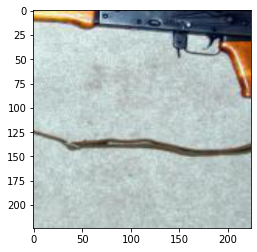

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


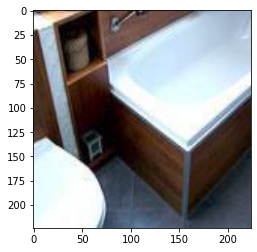

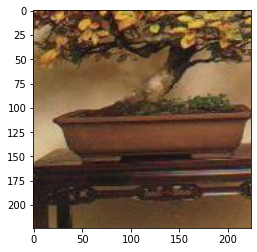

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


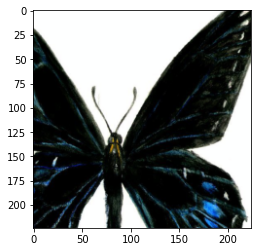

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


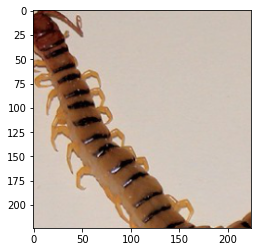

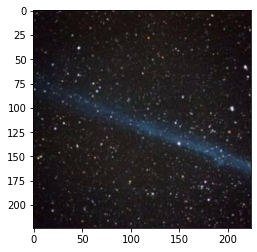

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


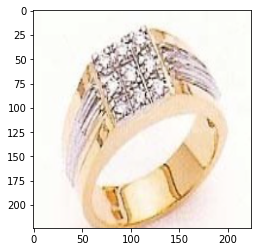

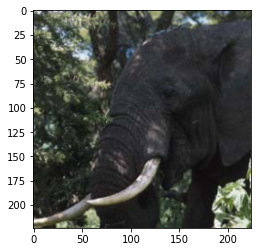

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


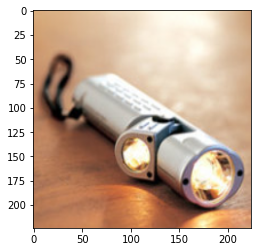

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


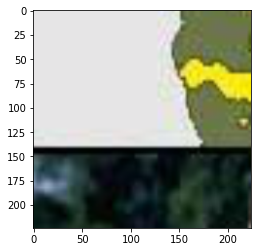

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


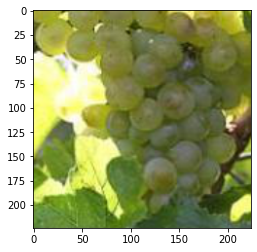

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


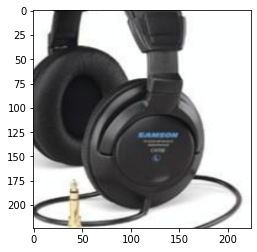

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


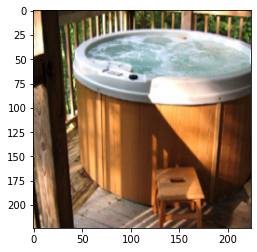

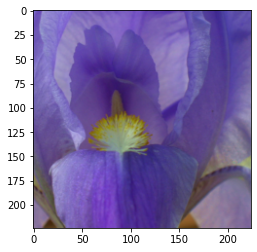

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


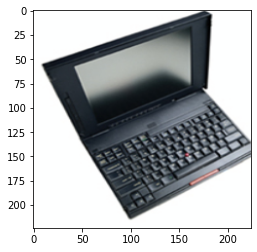

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


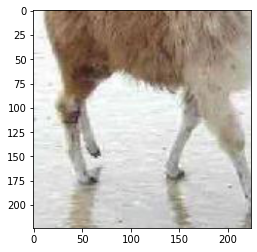

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


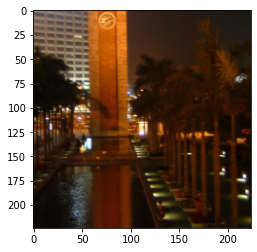

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


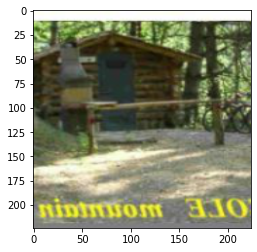

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


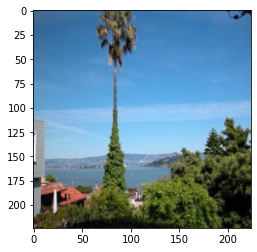

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


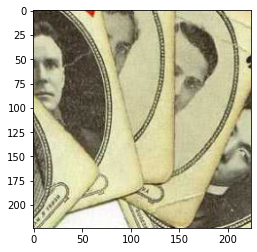

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


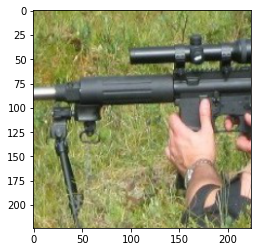

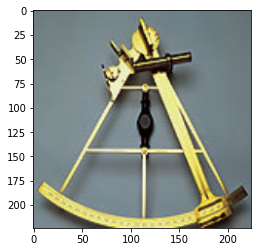

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


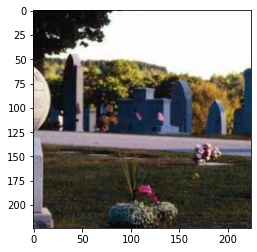

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


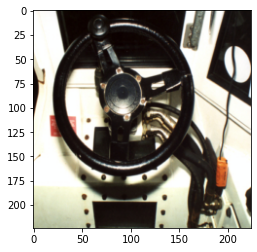

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


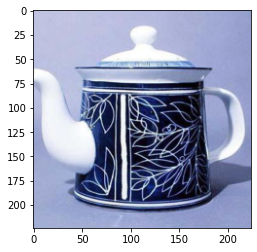

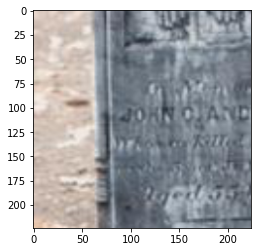

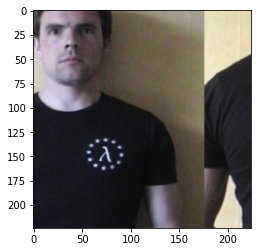

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


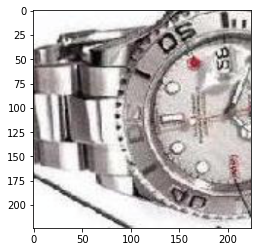

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


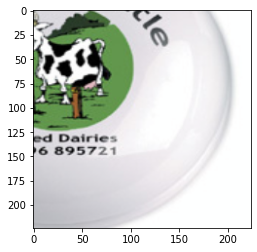

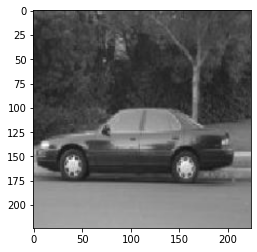

In [28]:
std = np.array([0.229, 0.224, 0.225]).reshape([1,1,3])
mean = np.array([0.485, 0.456, 0.406]).reshape([1,1,3])

for i in range(0, 30000, 1000):
    plt.figure()
    img = tmp[i][0].permute(1,2,0).numpy() * std + mean
    plt.imshow(img)
    plt.show()

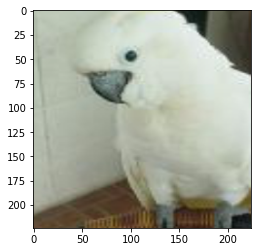

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


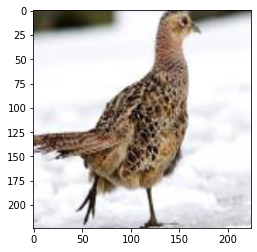

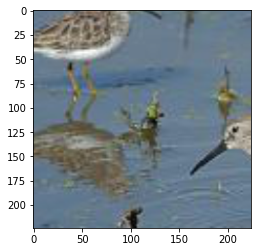

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


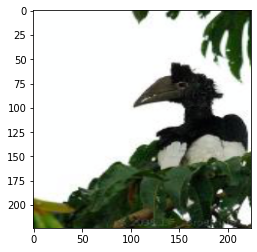

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


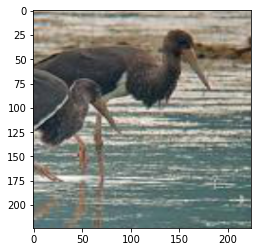

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


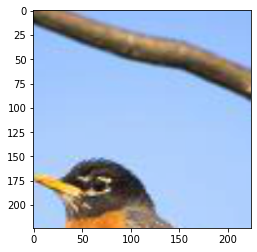

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


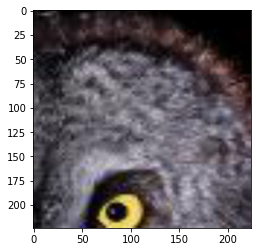

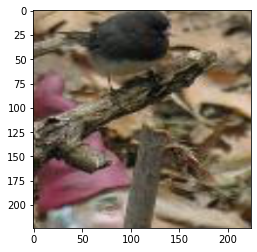

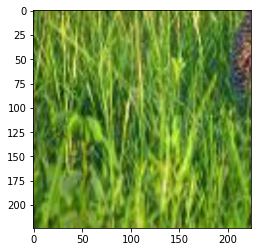

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


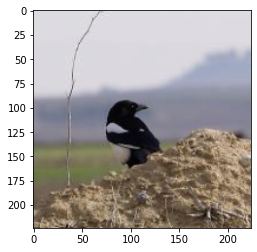

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


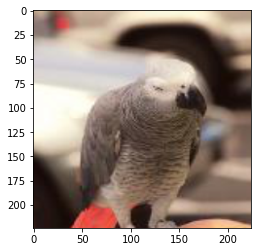

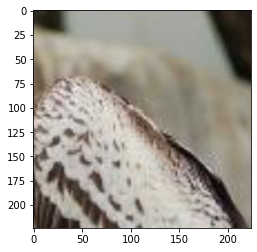

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


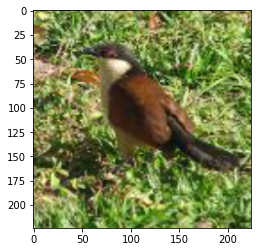

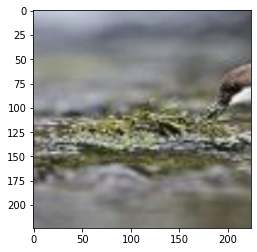

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


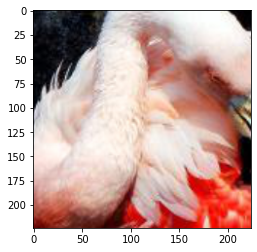

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


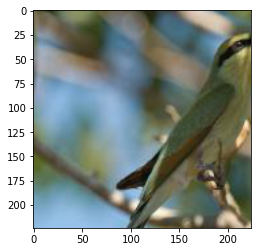

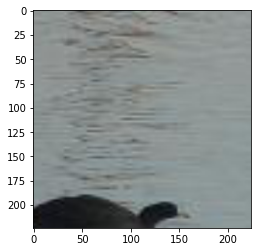

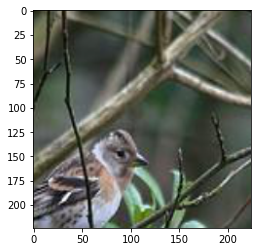

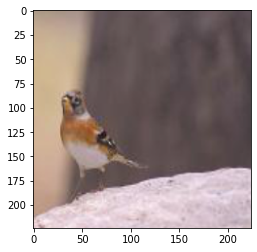

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


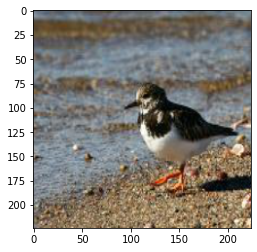

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


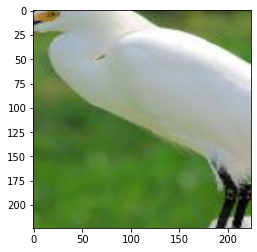

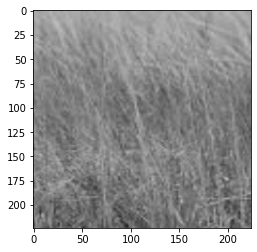

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


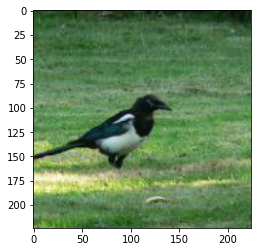

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


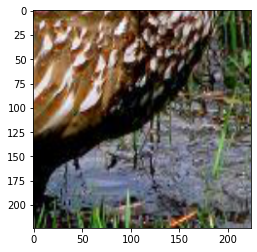

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


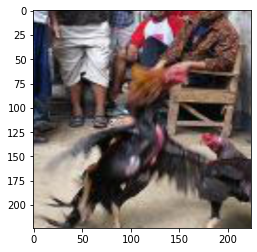

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


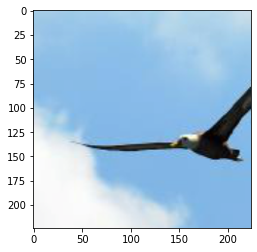

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


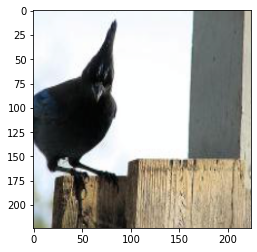

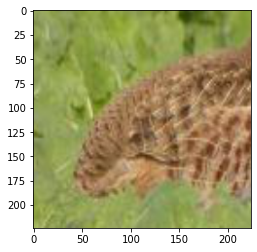

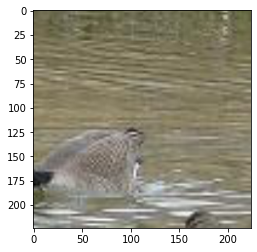

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


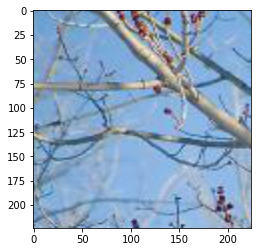

In [23]:
std = np.array([0.229, 0.224, 0.225]).reshape([1,1,3])
mean = np.array([0.485, 0.456, 0.406]).reshape([1,1,3])

for i in range(0, 30000, 1000):
    plt.figure()
    img = tmp[i][0].permute(1,2,0).numpy() * std + mean
    plt.imshow(img)
    plt.show()

0


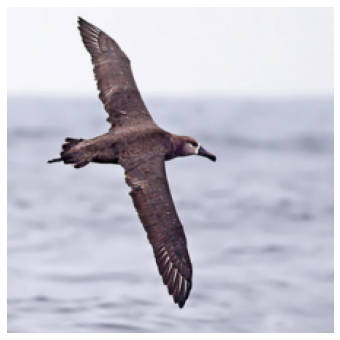

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


500


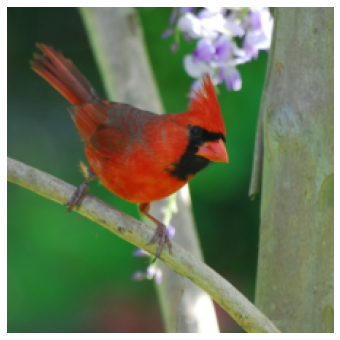

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1000


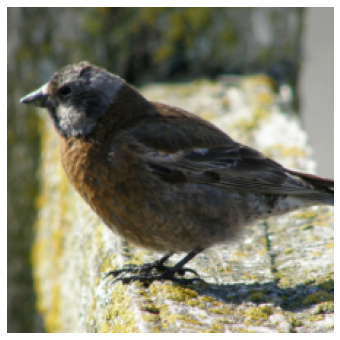

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1500


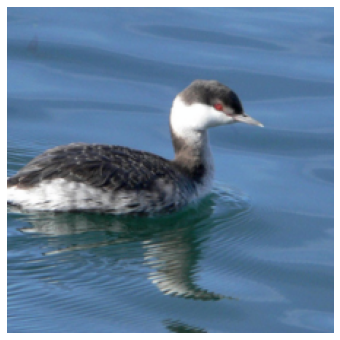

2000


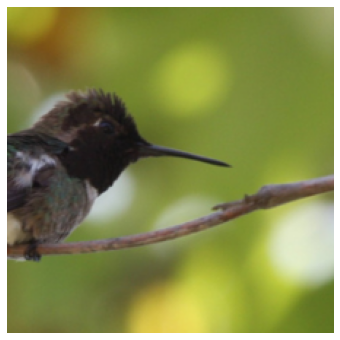

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2500


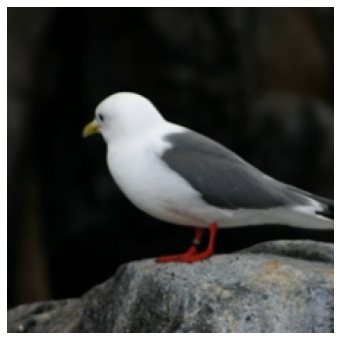

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3000


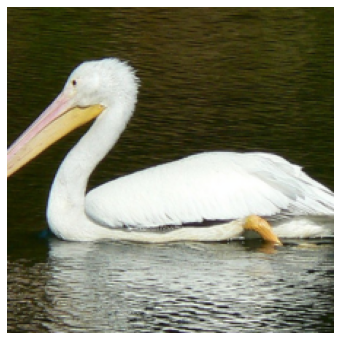

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3500


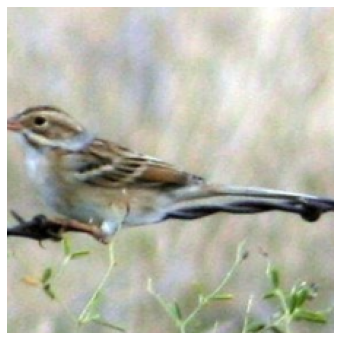

4000


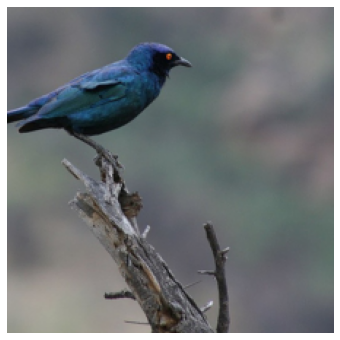

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4500


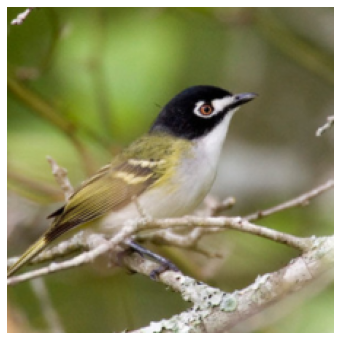

In [20]:
std = np.array([0.229, 0.224, 0.225]).reshape([1,1,3])
mean = np.array([0.485, 0.456, 0.406]).reshape([1,1,3])

for i in range(0, 5000, 500):
    plt.figure(figsize=(6,6))
    img = tmp[i][0].permute(1,2,0).numpy() * std + mean
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('./figures/img{}.png'.format(i), bbox_inches='tight')
    print(i)
    plt.show()